In [6]:
!pip install -q geopandas
!pip install -q osmnx
!pip uninstall --yes -q rtree
!sudo apt install -q libspatialindex-dev
!pip install -q rtree

/bin/bash: sudo: command not found


In [7]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True,
          useful_tags_way = ox.settings.useful_tags_way + ['surface_id', 'surface', 'incline', 'wheelchair'],
          useful_tags_node = ox.settings.useful_tags_node + ['wheelchair'])

In [8]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
  """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
  if loc_type == "address":
          G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
  elif loc_type == "points":
          G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
  return G

/srv/conda/envs/notebook/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/srv/conda/envs/notebook/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/srv/conda/envs/notebook/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


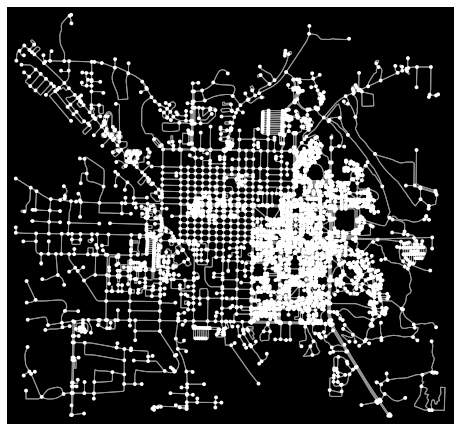

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
G = create_graph("Oxford, OH", 2000, "walk")
ox.plot_graph(G, bgcolor='black')

In [10]:
nodes, streets = ox.graph_to_gdfs(G)
streets.tail()

osmid name  highway  oneway  length  \
u          v          key                                            
9159753757 6636567785 0     97632733  NaN  footway   False   2.714   
           9159753760 0    991375865  NaN  footway   False  15.849   
9159753760 6636567785 0     97632733  NaN  footway   False   1.568   
           1130176068 0     97632733  NaN  footway   False   0.612   
           9159753757 0    991375865  NaN  footway   False  15.849   

                                                                    geometry  \
u          v          key                                                      
9159753757 6636567785 0    LINESTRING (-84.73437 39.50221, -84.73437 39.5...   
           9159753760 0    LINESTRING (-84.73437 39.50221, -84.73430 39.5...   
9159753760 6636567785 0    LINESTRING (-84.73437 39.50225, -84.73437 39.5...   
           1130176068 0    LINESTRING (-84.73437 39.50225, -84.73437 39.5...   
           9159753757 0    LINESTRING (-84.73437 39.50225, -84.73430 39.5...   

                          lanes service surface maxspeed access incline  ref  \
u          v          key                                                      
9159753757 6636567785 0     NaN     NaN     NaN      NaN    NaN     NaN  NaN   
           9159753760 0     NaN     NaN     NaN      NaN    NaN     NaN  NaN   
9159753760 6636567785 0     NaN     NaN     NaN      NaN    NaN     NaN  NaN   
           1130176068 0     NaN     NaN     NaN      NaN    NaN     NaN  NaN   
           9159753757 0     NaN     NaN     NaN      NaN    NaN     NaN  NaN   

                          bridge tunnel junction area wheelchair  
u          v          key                                         
9159753757 6636567785 0      NaN    NaN      NaN  NaN        NaN  
           9159753760 0      NaN    NaN      NaN  NaN        NaN  
9159753760 6636567785 0      NaN    NaN      NaN  NaN        NaN  
           1130176068 0      NaN    NaN      NaN  NaN        NaN  
           9159753757 0      NaN    NaN      NaN  NaN        NaN